In [1]:
cd TileEM/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM


In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
from TileEM_plot_toolbox import *

Populating the interactive namespace from numpy and matplotlib


In [3]:
cd step500_output/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM/step500_output


In [59]:
def plot_all_T_search_PR_curves(objid,postprocess='majority-top-k'):
    '''
    Plot PR curves for each object for all T-search methods
    '''
    experiment_names = {0:'Avrg',1:'Median',2:'Local',3:'Exhaustive'}

    plt.figure()
    plt.title("Object #{0} [{1}]".format(objid,postprocess))
    # Worker Individual Precision and Recall based on their BB drawn for this object
    worker_precision_lst,worker_recall_lst = compute_worker_PR_obj(objid)
    plt.plot(worker_recall_lst ,worker_precision_lst , '.',color='gray',label="Worker")

    os.chdir("..")
    tiles, objIndicatorMat = createObjIndicatorMatrix(objid,sampleNworkers=40,PRINT=False)
    os.chdir("step500_output")
    k_lst = np.arange(1,len(tiles))
    linestyles = ['--','-','-.','--']
    markers=['^','D','o','>']
    for experiment_idx in [2,3,0,1]:
        if postprocess == 'majority-top-k':
            # Plotting PR from Top-k Majority vote 
            Maj_topk_precision_lst = []
            Maj_topk_recall_lst = []
            for  k in k_lst :
                Maj_topk_precision,Maj_topk_recall= compute_PR_obj(objid,experiment_idx,topk=k)
                Maj_topk_precision_lst.append(Maj_topk_precision)
                Maj_topk_recall_lst.append(Maj_topk_recall)
            Maj_topk_recall_lst = np.array(Maj_topk_recall_lst)
            Maj_topk_precision_lst = np.array(Maj_topk_precision_lst)
            order = np.argsort(Maj_topk_recall_lst)
            plt.plot(Maj_topk_recall_lst[order],Maj_topk_precision_lst[order], linestyle=linestyles[experiment_idx], linewidth=experiment_idx+1, marker=markers[experiment_idx], label=experiment_names[experiment_idx])
        elif postprocess == 'tile-threshold':
            # Plotting PR from TileEM for different thresholds
            threshold_lst = np.linspace(0,0.95,20)
            TileEM_thres_precision_lst = []
            TileEM_thres_recall_lst = []
            for threshold in threshold_lst :
                TileEM_thres_precision, TileEM_thres_recall= compute_PR_obj(objid,experiment_idx,threshold=threshold)
                TileEM_thres_precision_lst.append(TileEM_thres_precision)
                TileEM_thres_recall_lst.append(TileEM_thres_recall)
            TileEM_thres_recall_lst = np.array(TileEM_thres_recall_lst)
            TileEM_thres_precision_lst = np.array(TileEM_thres_precision_lst)
            #     print "{0}:{1},{2}".format(threshold,TileEM_thres_precision,TileEM_thres_recall)
            order = np.argsort(TileEM_thres_recall_lst)
            plt.plot(TileEM_thres_recall_lst[order],TileEM_thres_precision_lst[order], linestyle=linestyles[experiment_idx],linewidth=experiment_idx+1, marker=markers[experiment_idx], label=experiment_names[experiment_idx])
        elif postprocess=='tile-top-k':
            # Plotting PR from TileEM for different Top-k
            TileEM_topk_precision_lst = []
            TileEM_topk_recall_lst = []
            for  k in k_lst :
                TileEM_topk_precision, TileEM_topk_recall= compute_PR_obj(objid,experiment_idx,topk=k)
                TileEM_topk_precision_lst.append(TileEM_topk_precision)
                TileEM_topk_recall_lst.append(TileEM_topk_recall)
            TileEM_topk_recall_lst = np.array(TileEM_topk_recall_lst)
            TileEM_topk_precision_lst = np.array(TileEM_topk_precision_lst)
            order = np.argsort(TileEM_topk_recall_lst)
            plt.plot(TileEM_topk_recall_lst[order],TileEM_topk_precision_lst[order], linestyle=linestyles[experiment_idx], linewidth=experiment_idx+1,marker=markers[experiment_idx], label=experiment_names[experiment_idx])

    plt.xlim(0,1.05)
    plt.ylim(0,1.05)
    plt.ylabel("Precision",fontsize=13)
    plt.xlabel("Recall",fontsize=13)
    lgd = plt.legend( numpoints=1, loc="center right", bbox_to_anchor=(1.4, 0.5))
    plt.savefig("PR_obj{0}_{1}.pdf".format(objid,postprocess), bbox_extra_artists=(lgd,),bbox_inches='tight')

In [63]:
object_lst = list(object_tbl.id)

 55%|█████▌    | 26/47 [10:56<08:50,  0.04it/s]ERROR:shapely.geos:TopologyException: Input geom 0 is invalid: Self-intersection at or near point 49.100000000000001 617.05566218809986 at 49.100000000000001 617.05566218809986
ERROR:shapely.geos:TopologyException: Input geom 0 is invalid: Self-intersection at or near point 49.100000000000001 617.05566218809986 at 49.100000000000001 617.05566218809986
ERROR:shapely.geos:TopologyException: Input geom 0 is invalid: Self-intersection at or near point 49.100000000000001 617.05566218809986 at 49.100000000000001 617.05566218809986
ERROR:shapely.geos:TopologyException: Input geom 1 is invalid: Self-intersection at or near point 49.100000000000001 617.05566218809986 at 49.100000000000001 617.05566218809986
ERROR:shapely.geos:TopologyException: Input geom 1 is invalid: Self-intersection at or near point 49.100000000000001 617.05566218809986 at 49.100000000000001 617.05566218809986
ERROR:shapely.geos:TopologyException: Input geom 1 is invalid: Self-

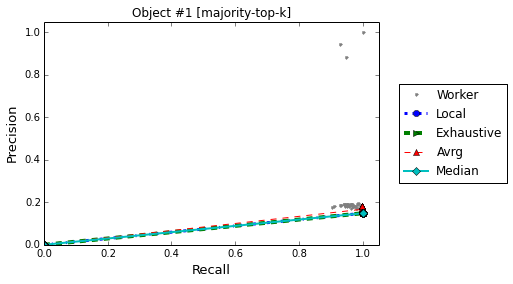

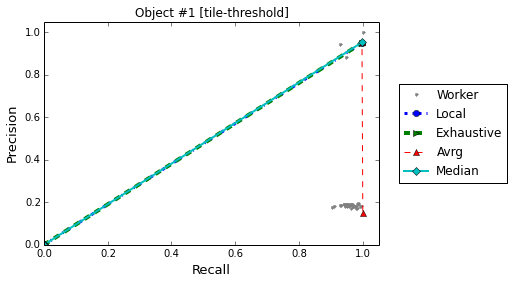

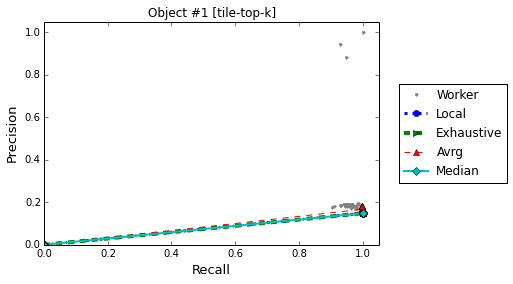

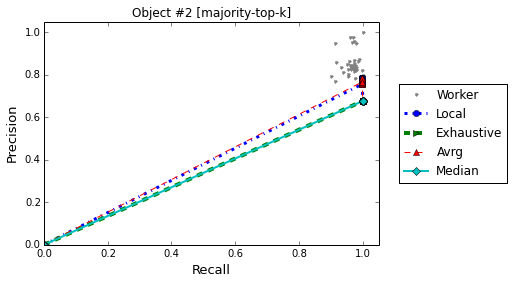

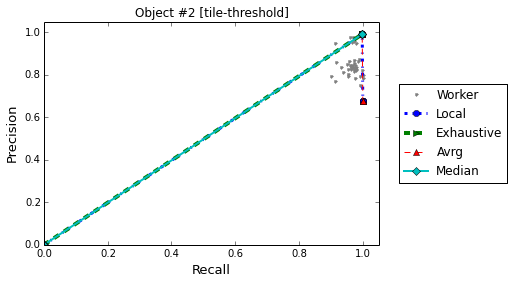

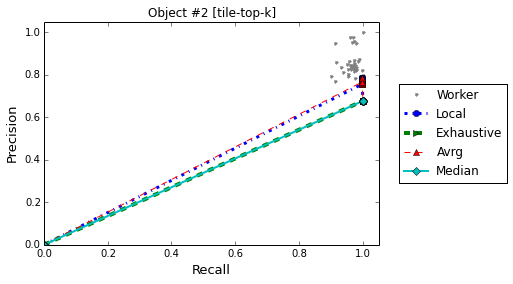

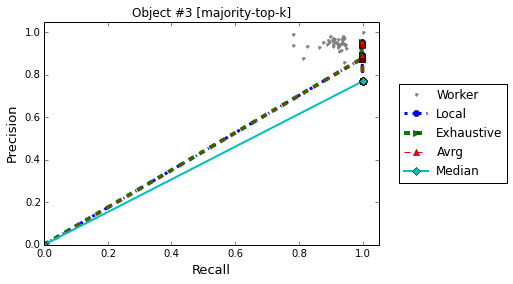

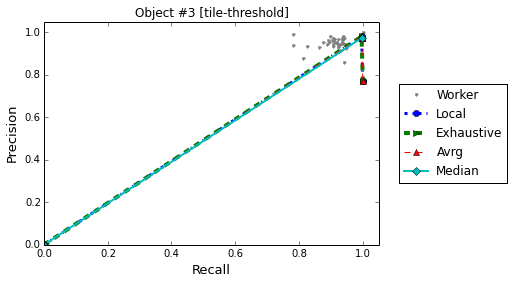

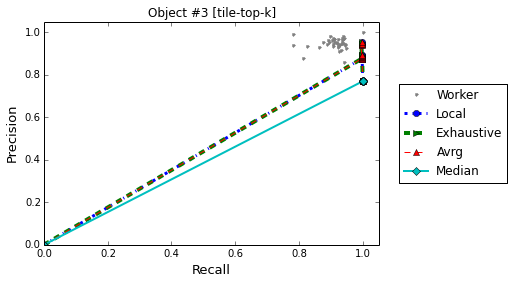

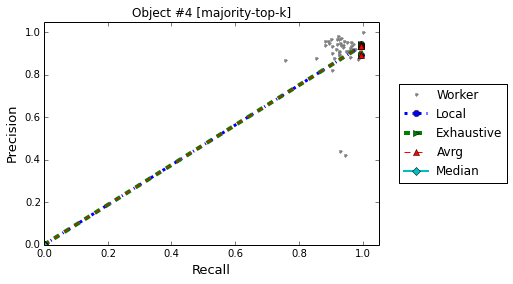

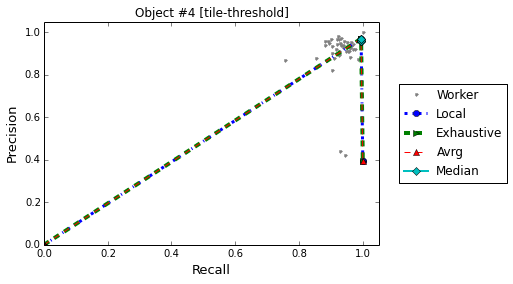

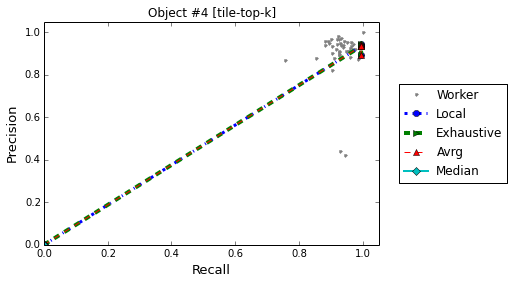

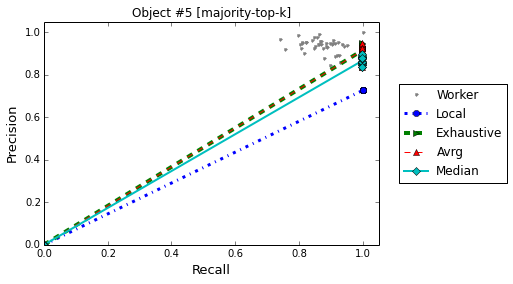

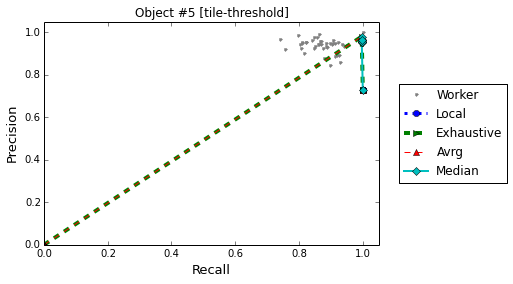

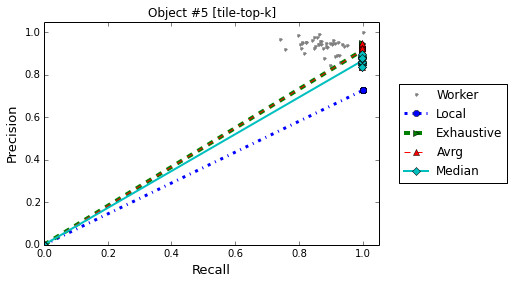

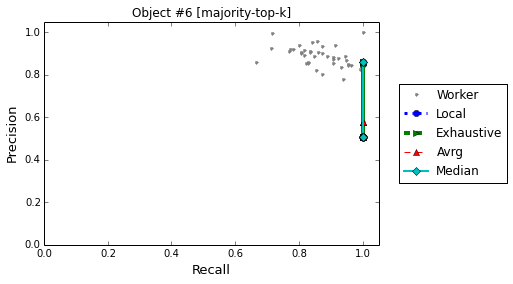

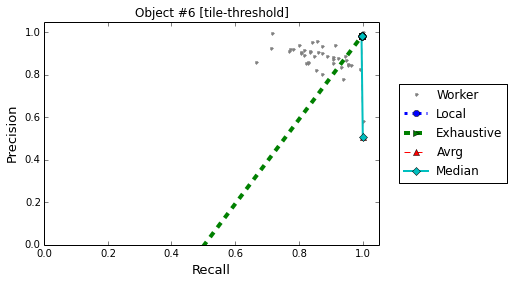

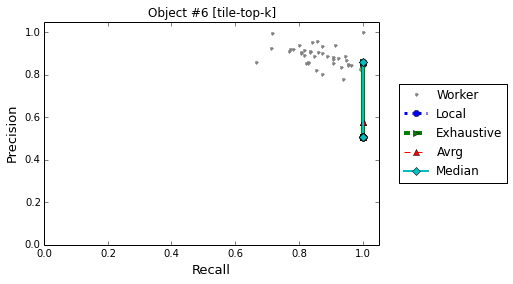

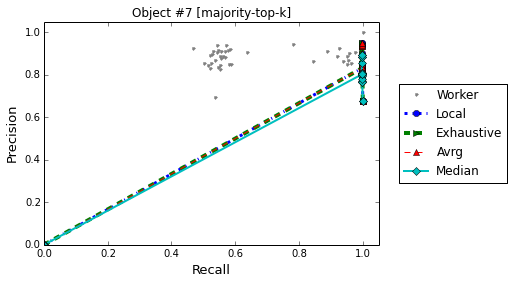

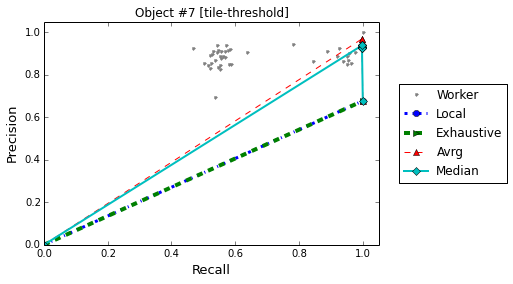

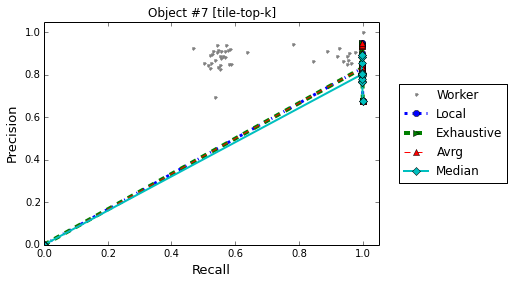

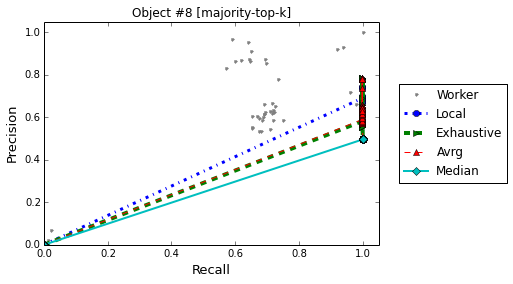

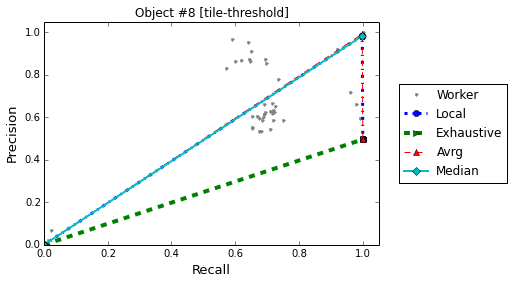

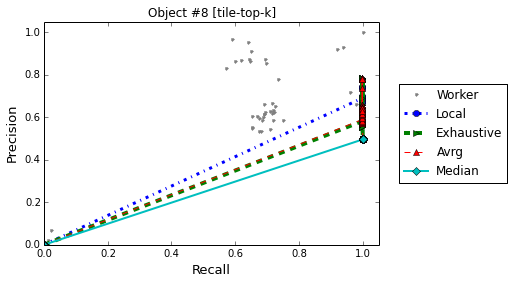

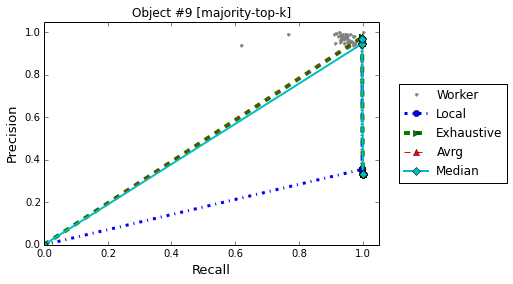

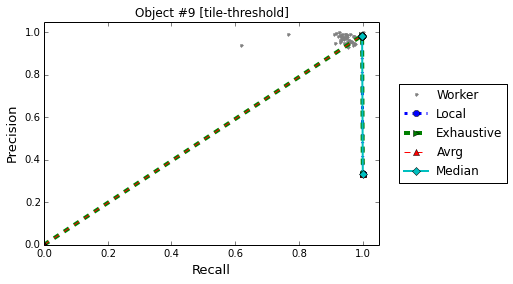

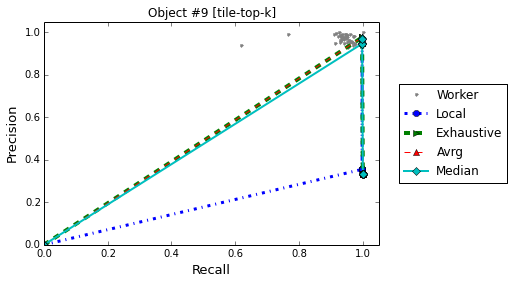

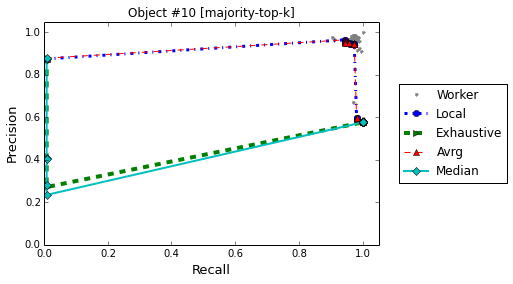

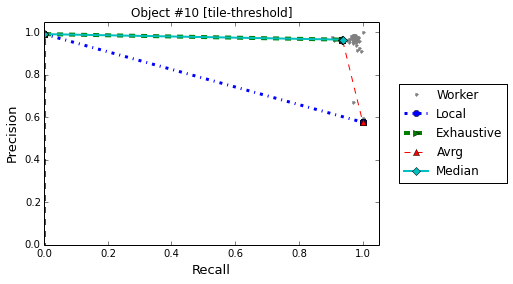

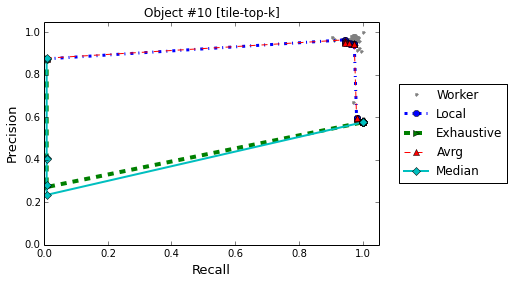

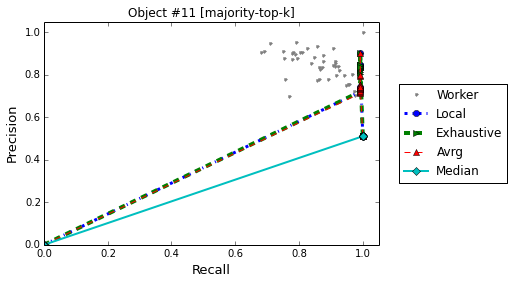

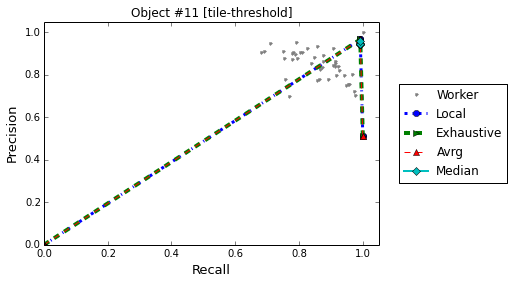

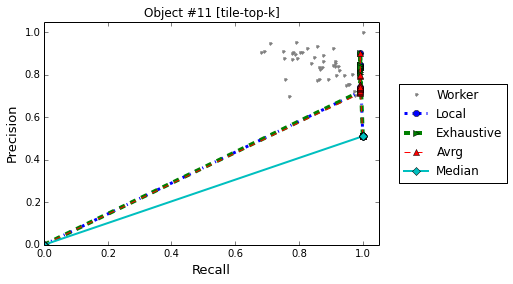

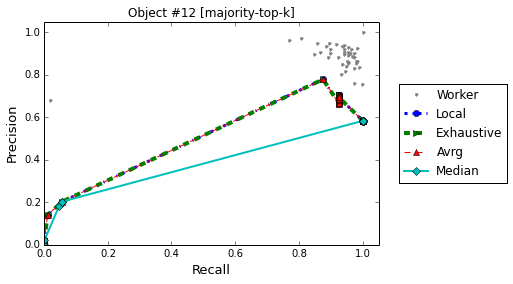

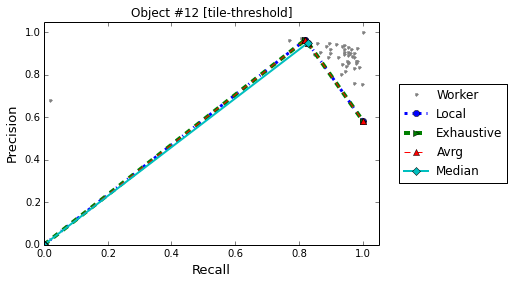

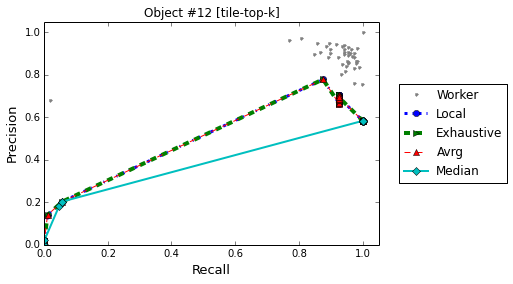

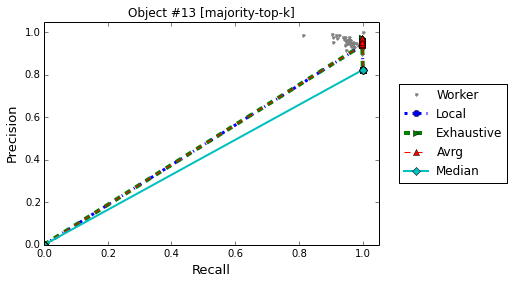

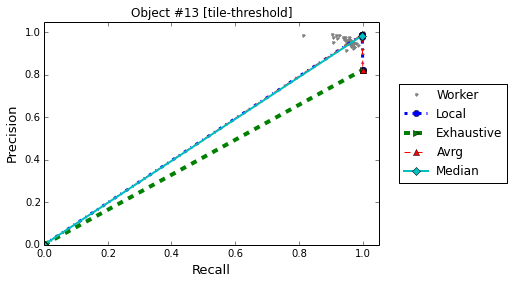

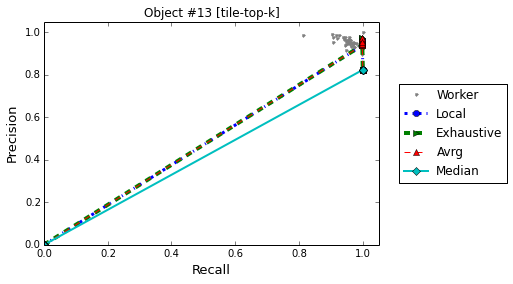

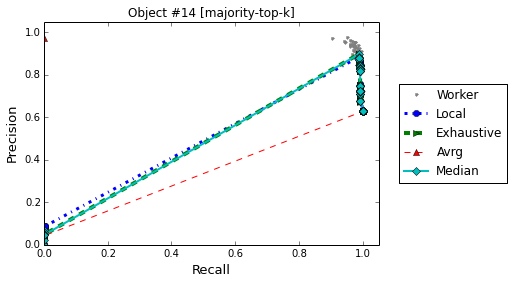

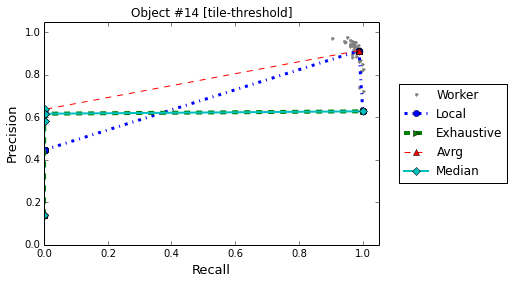

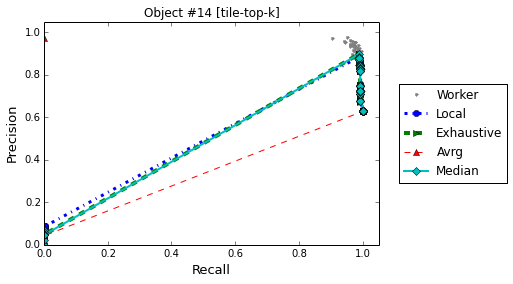

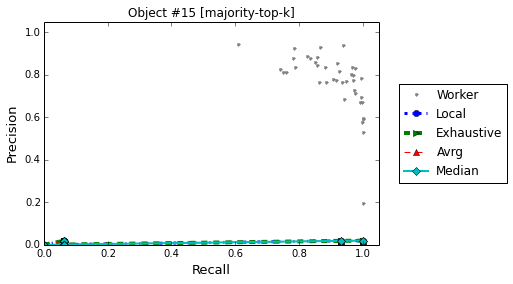

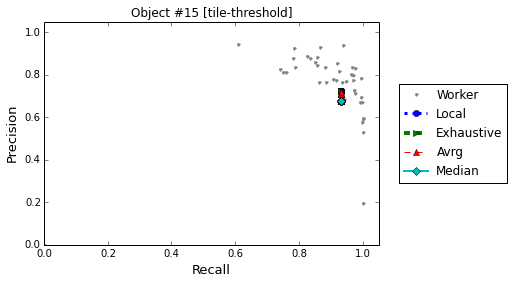

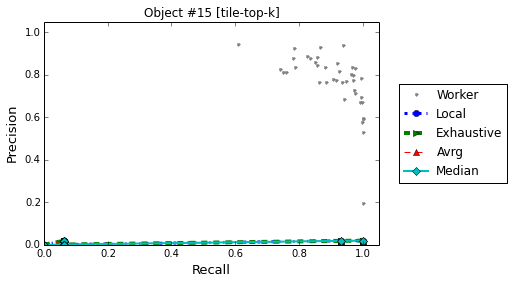

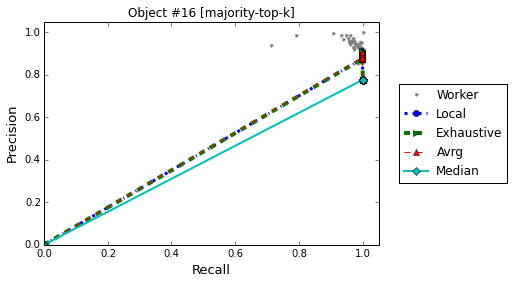

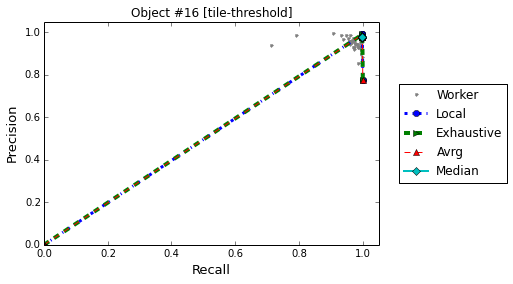

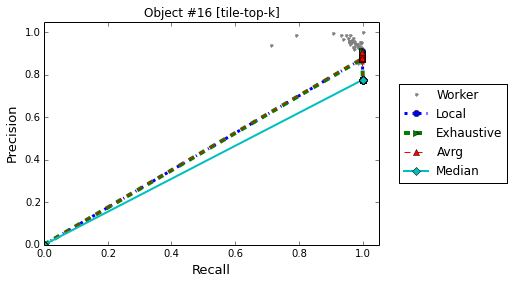

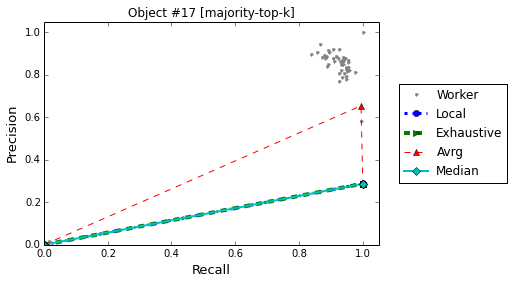

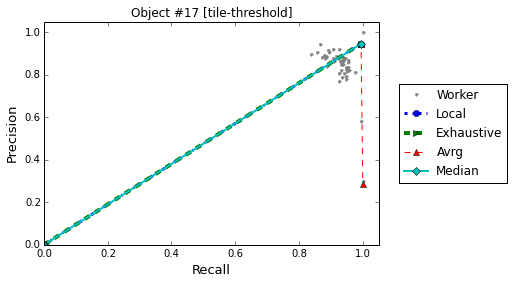

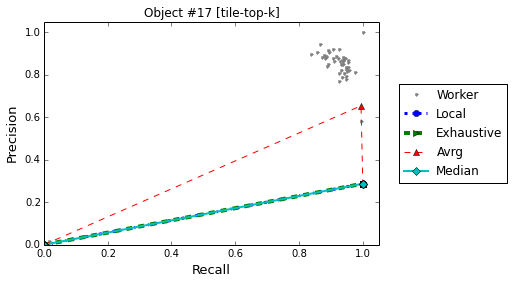

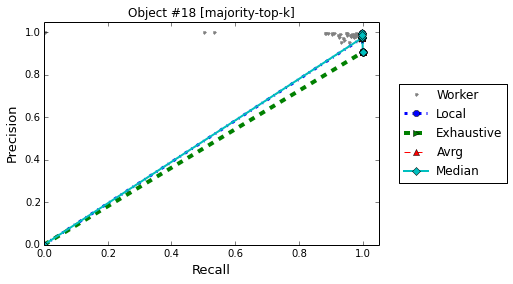

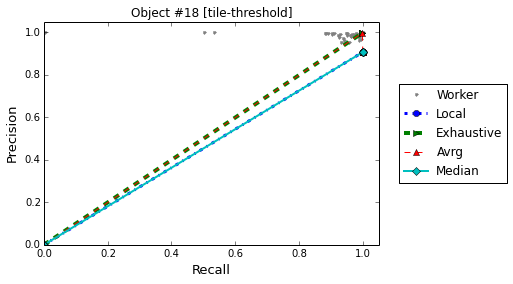

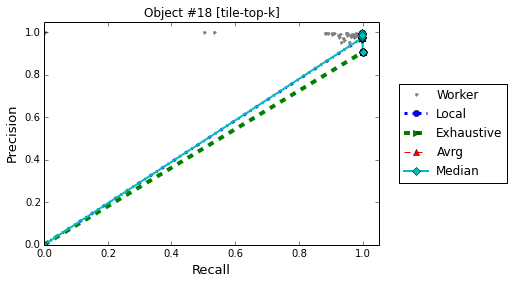

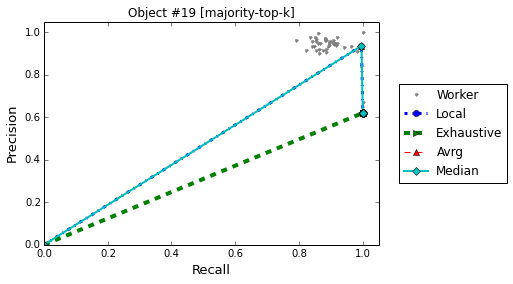

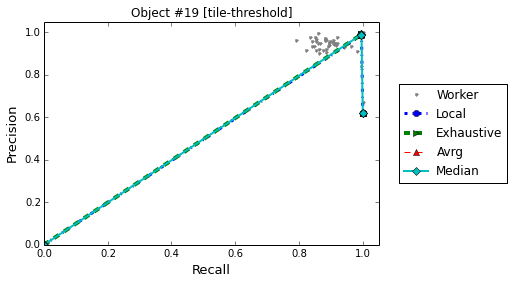

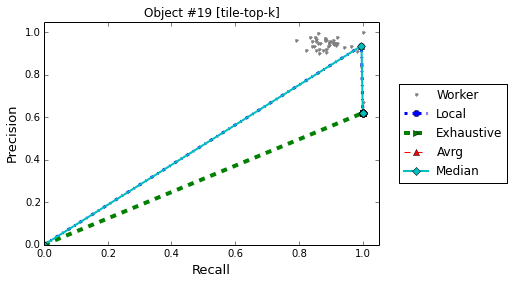

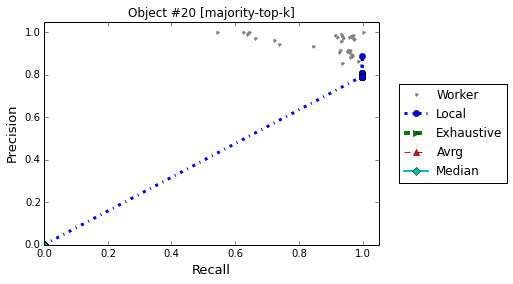

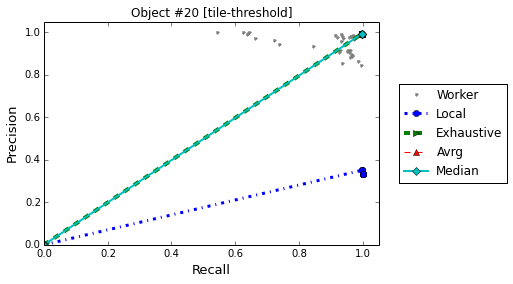

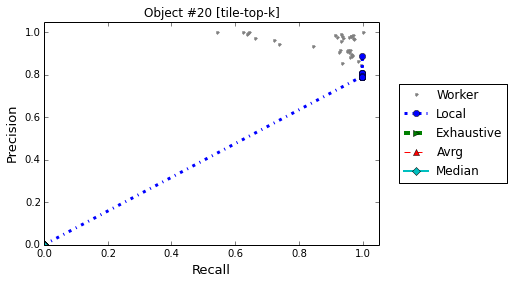

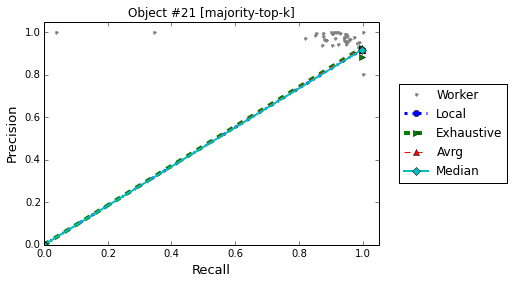

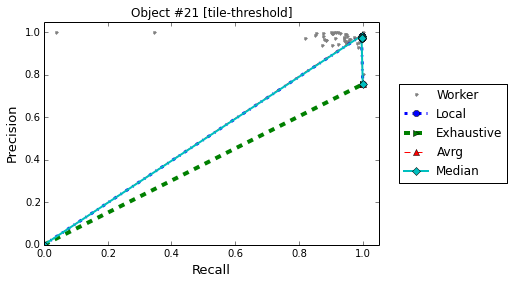

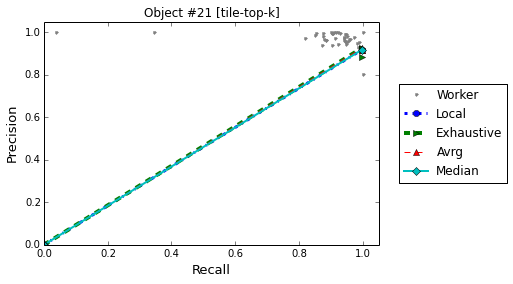

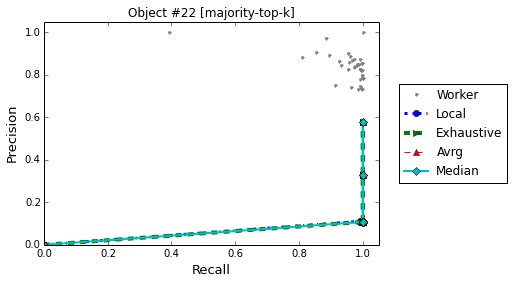

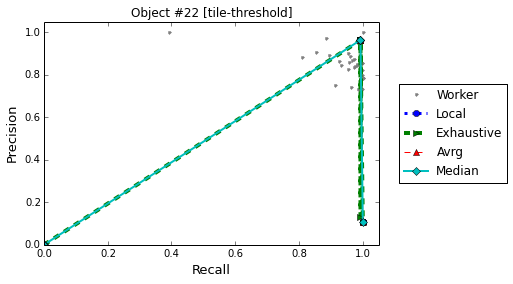

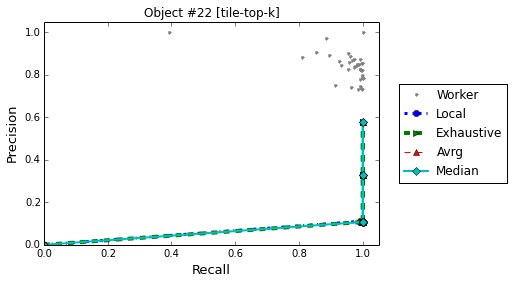

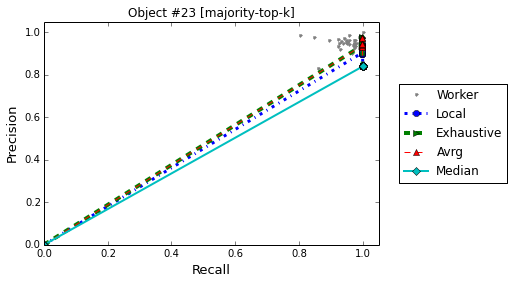

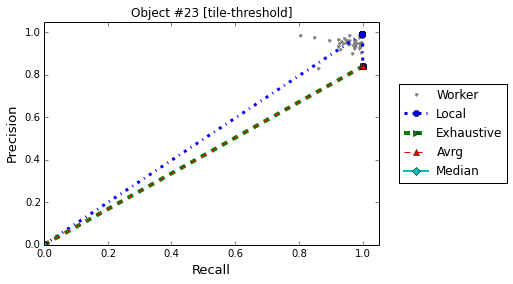

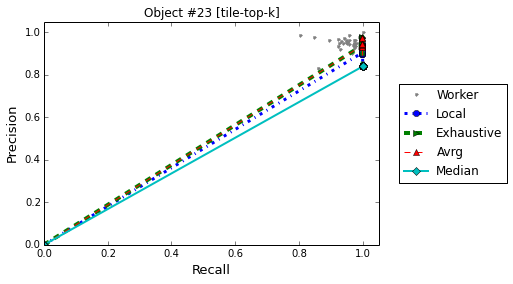

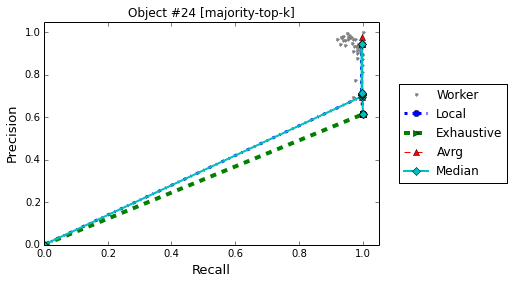

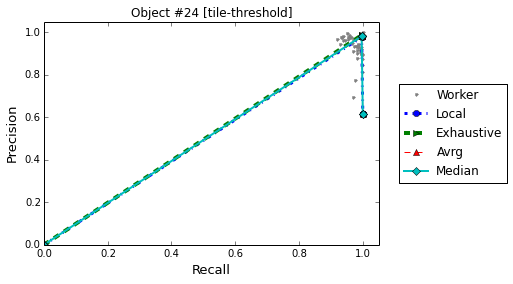

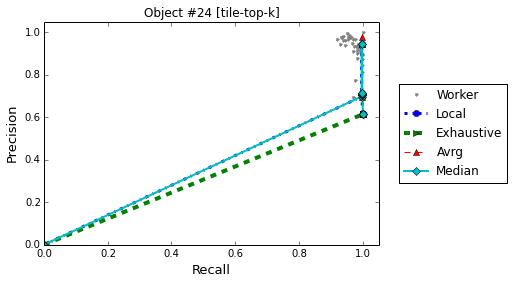

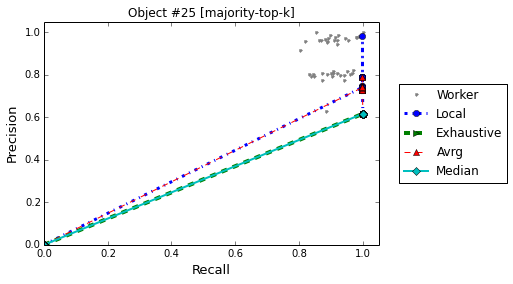

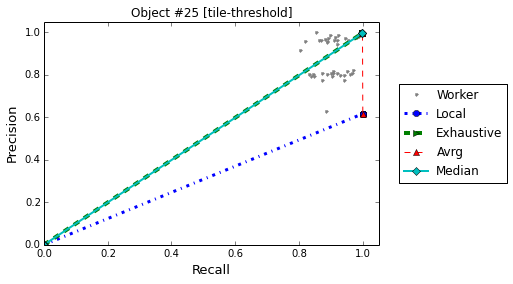

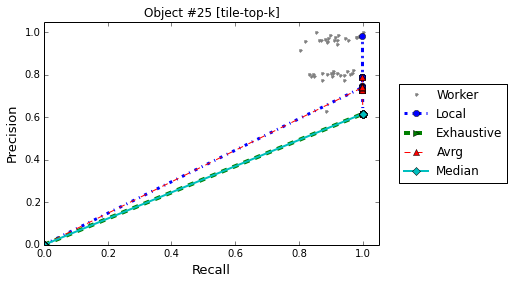

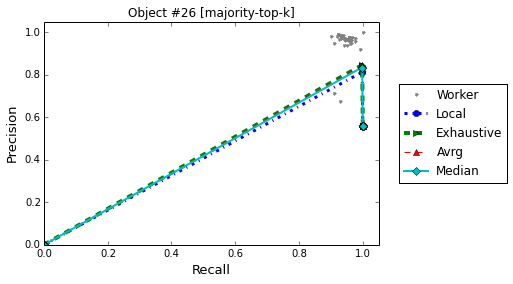

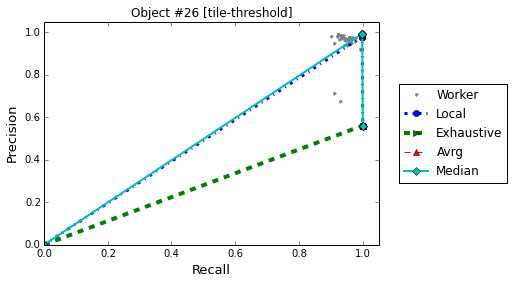

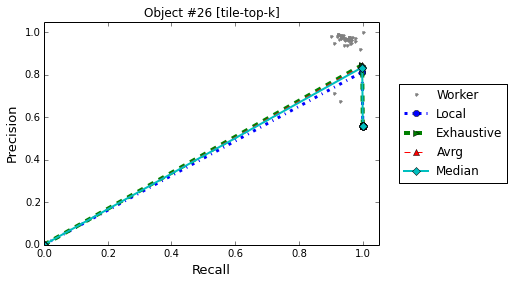

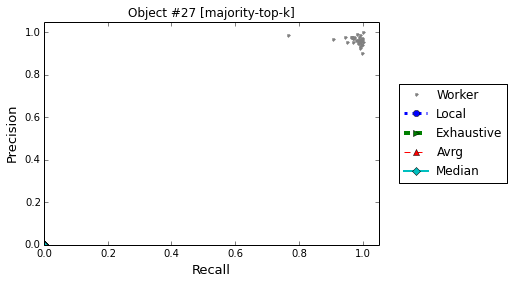

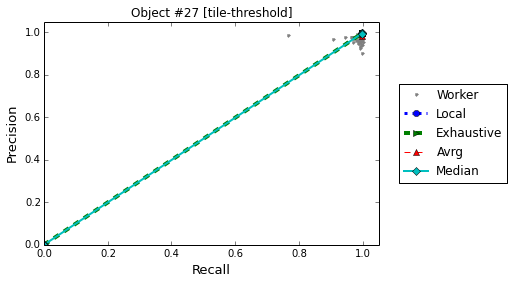

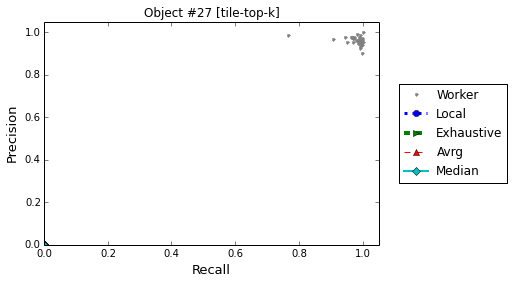

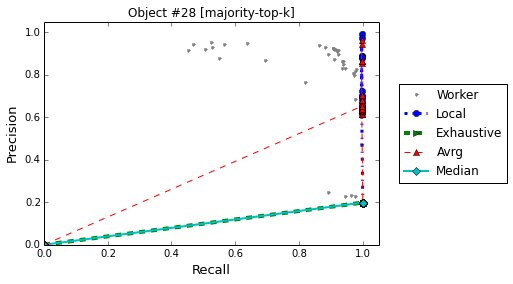

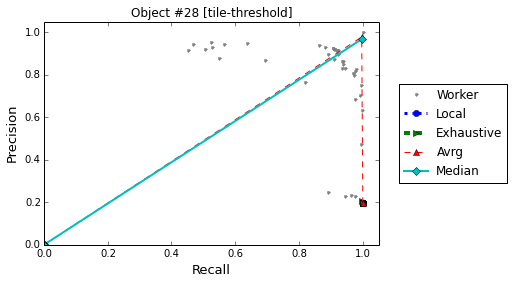

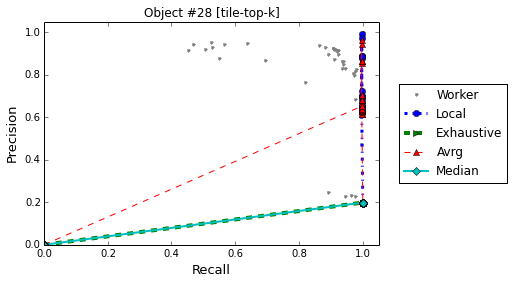

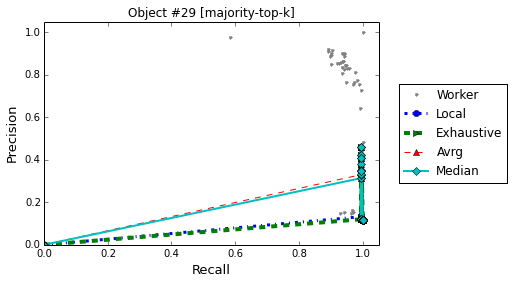

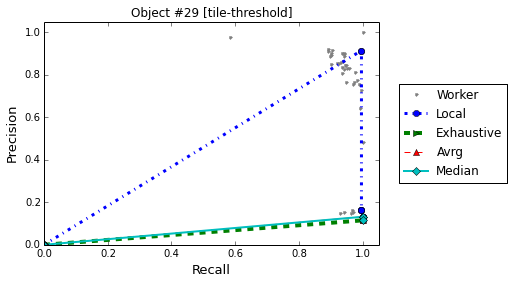

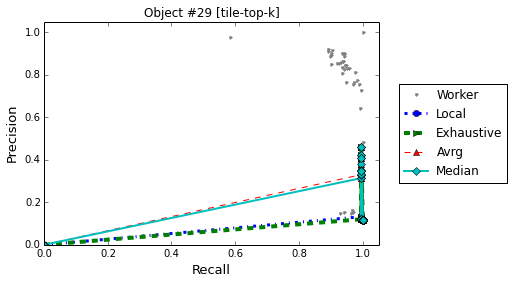

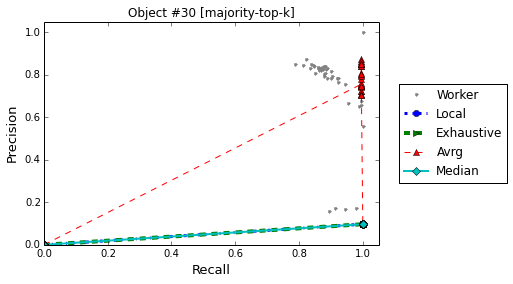

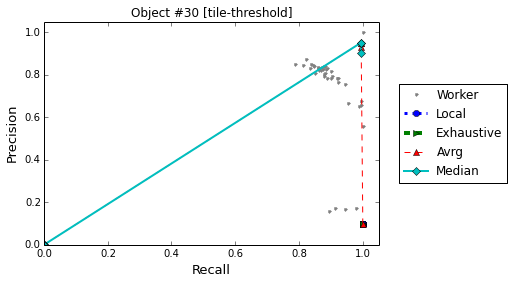

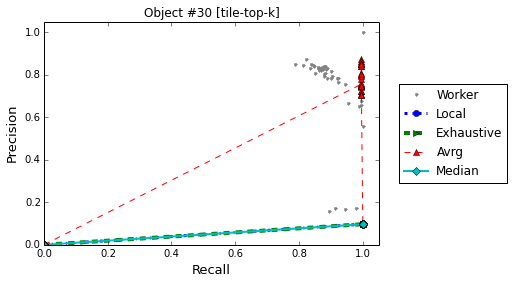

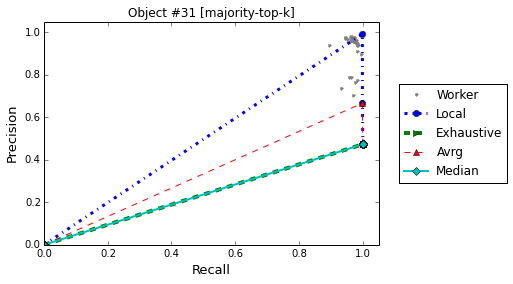

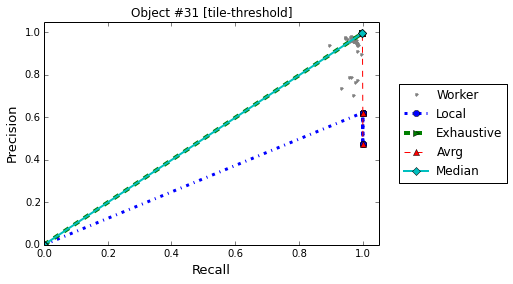

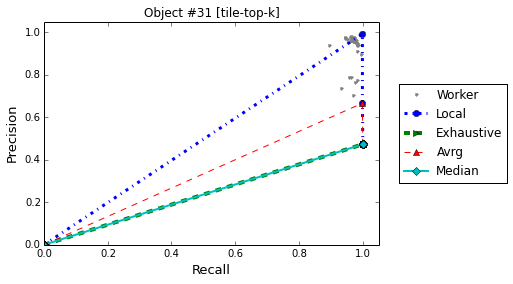

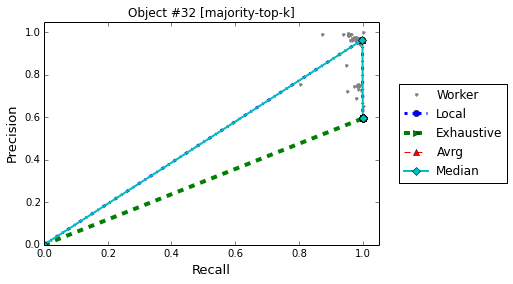

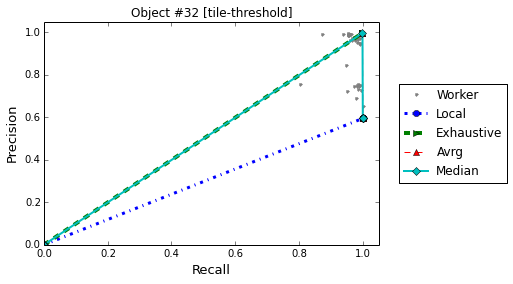

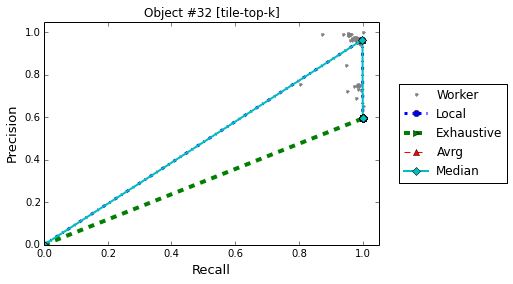

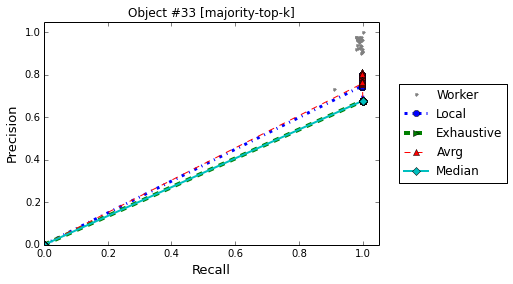

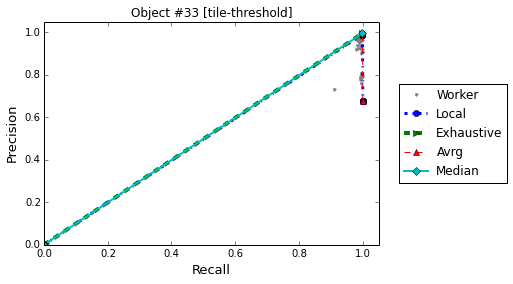

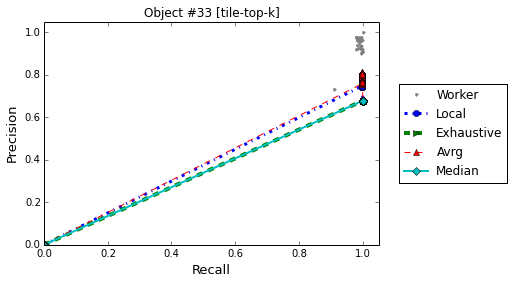

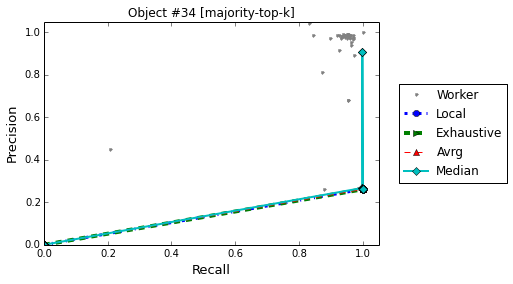

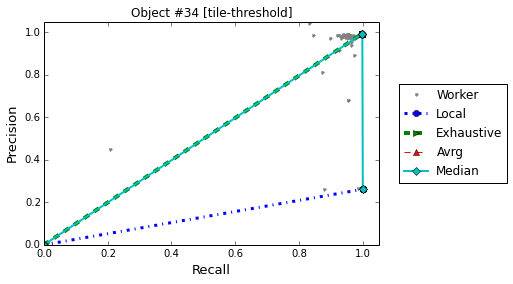

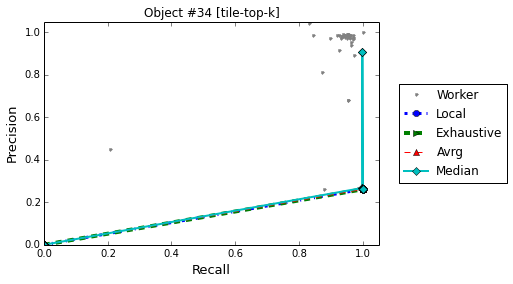

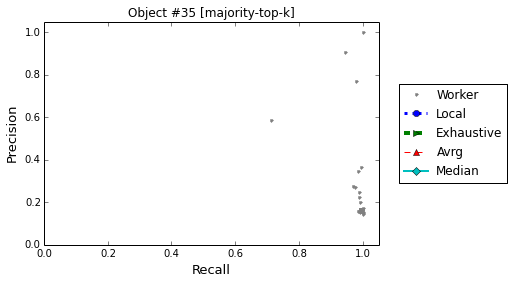

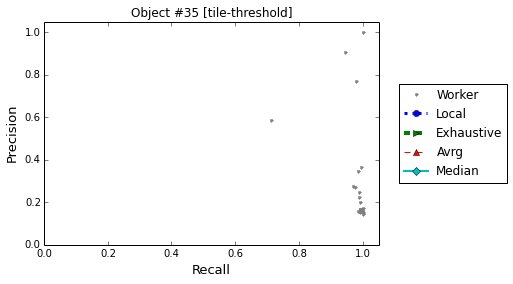

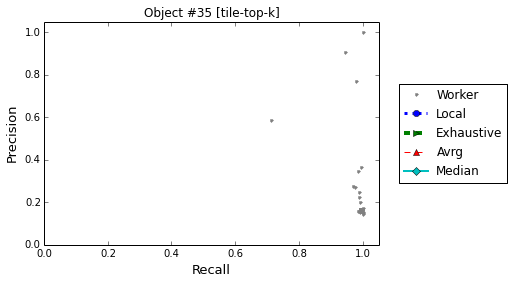

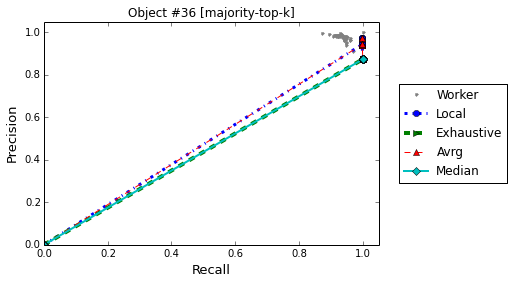

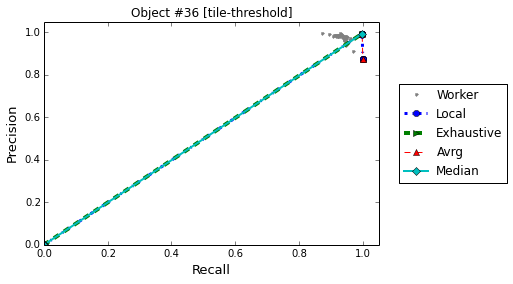

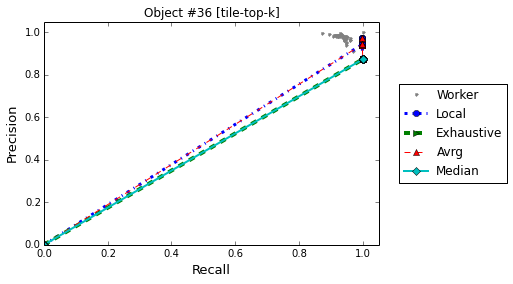

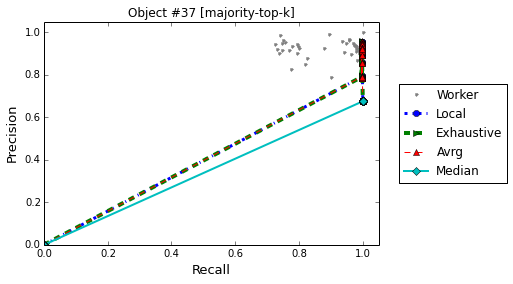

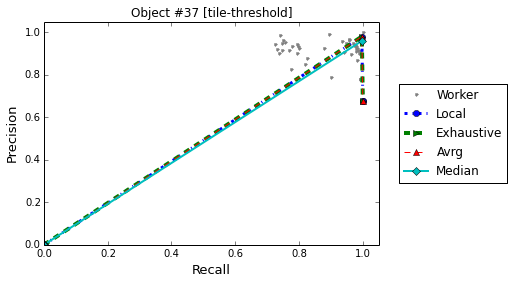

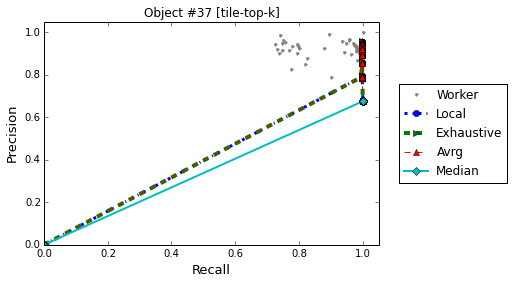

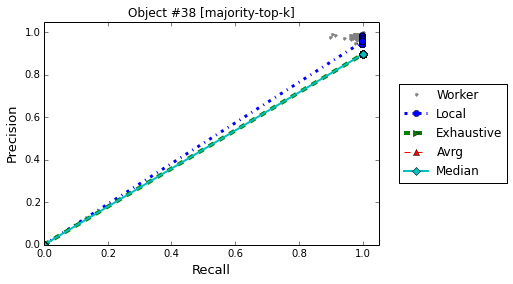

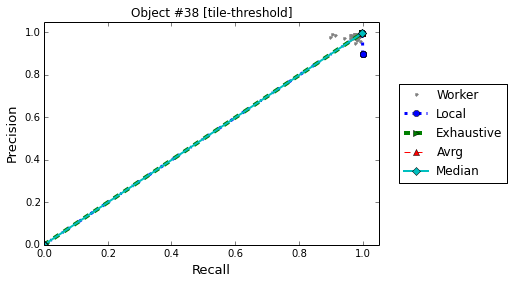

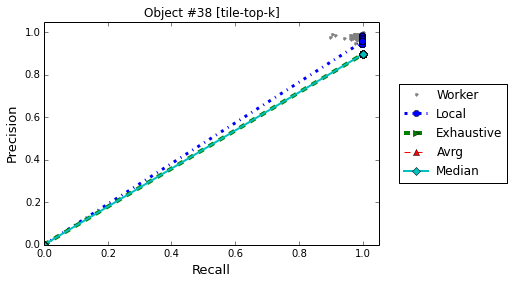

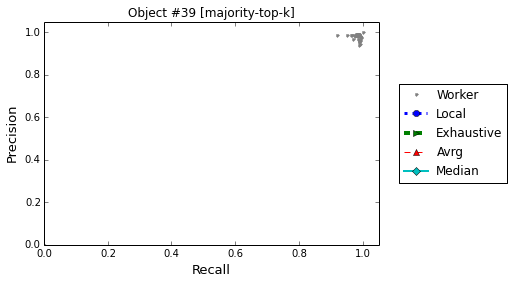

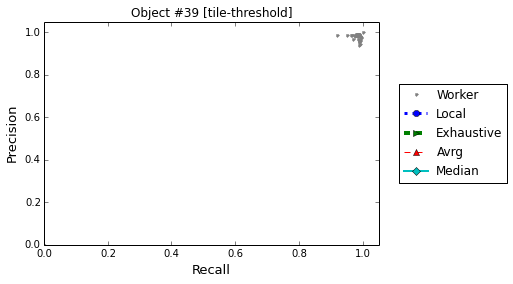

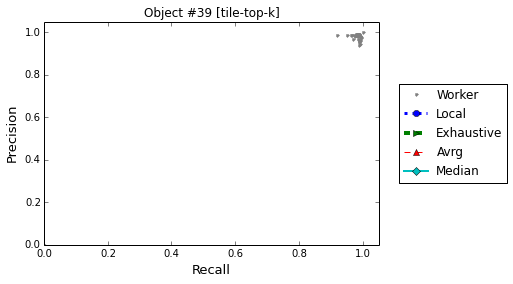

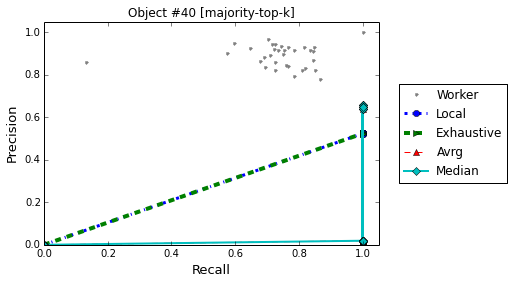

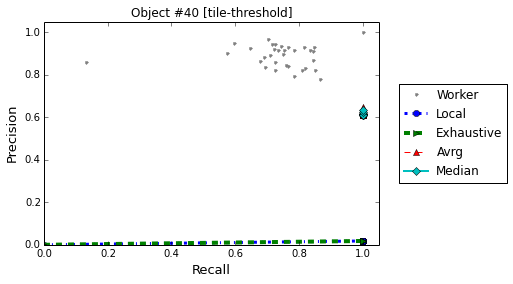

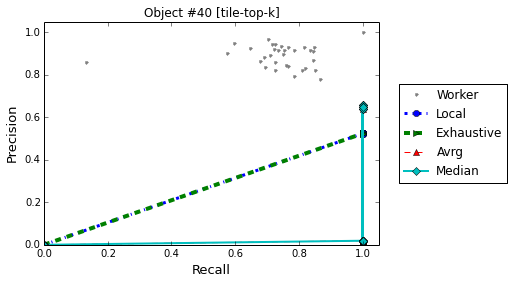

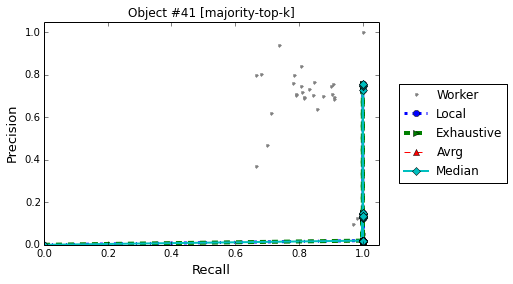

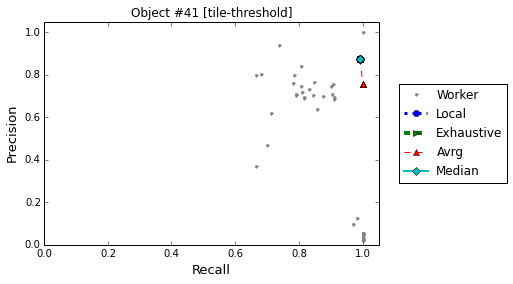

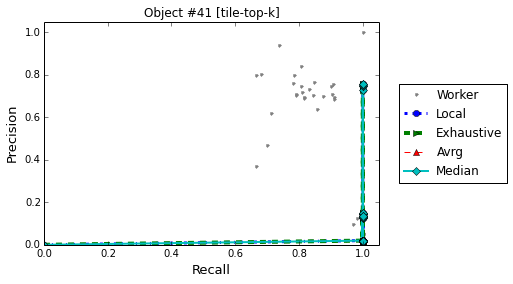

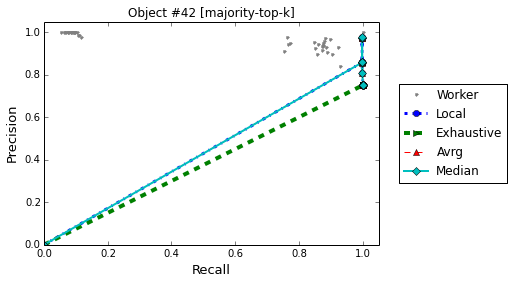

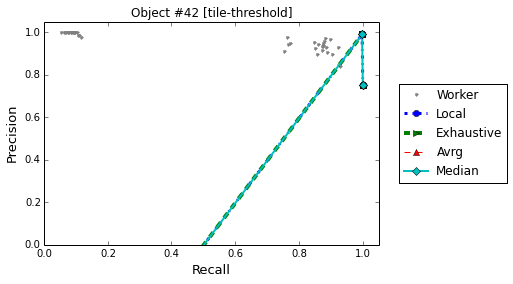

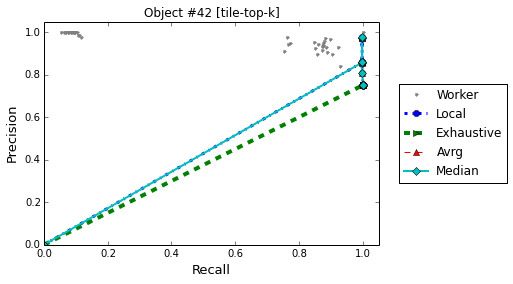

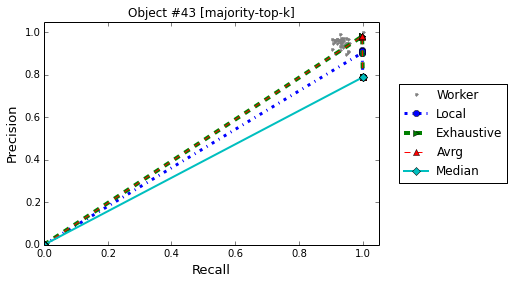

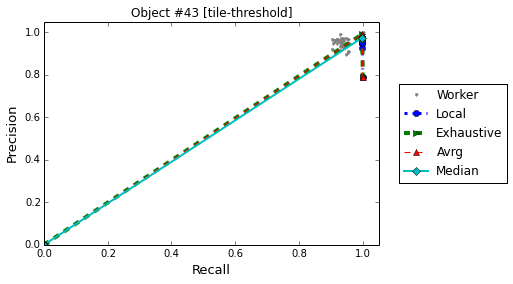

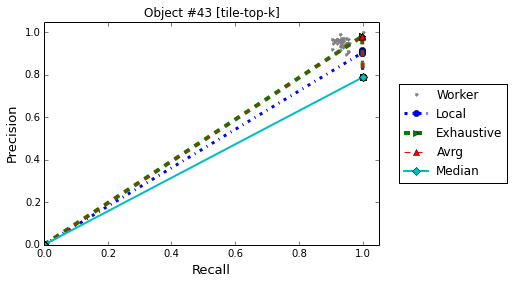

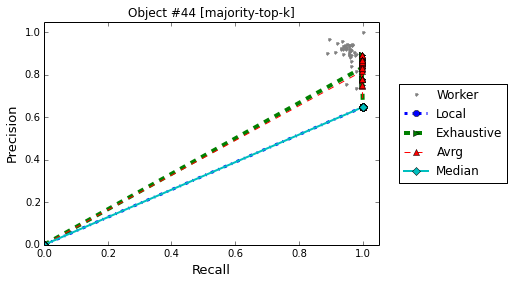

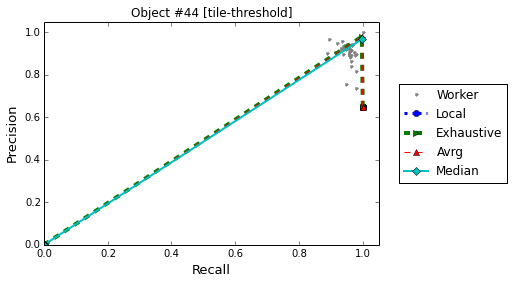

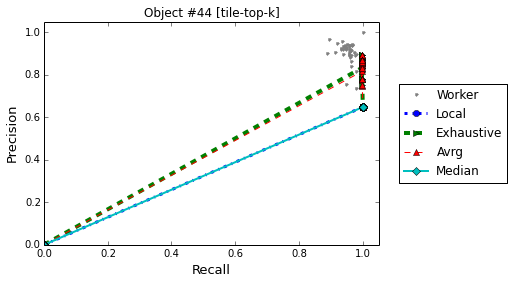

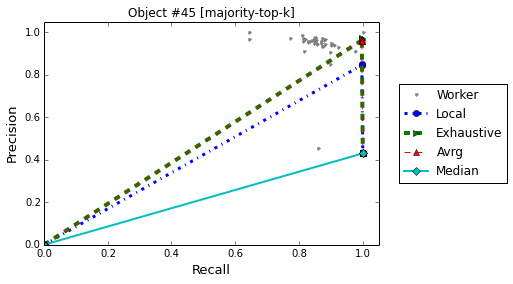

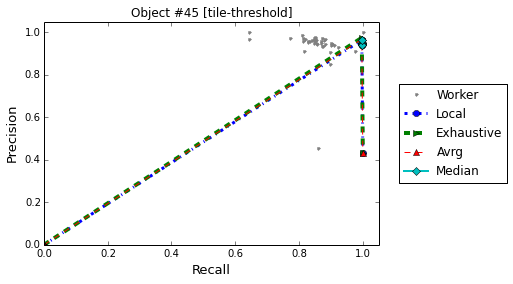

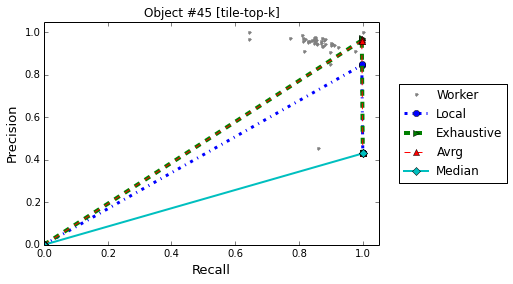

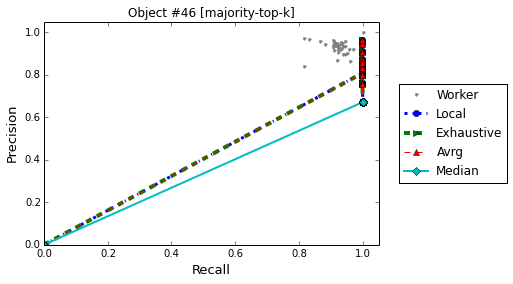

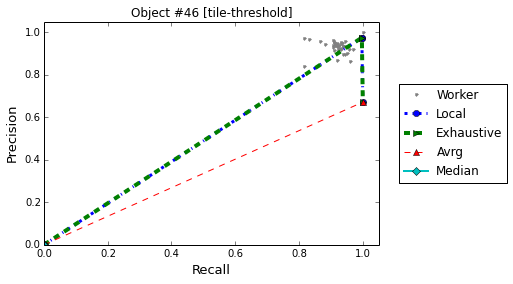

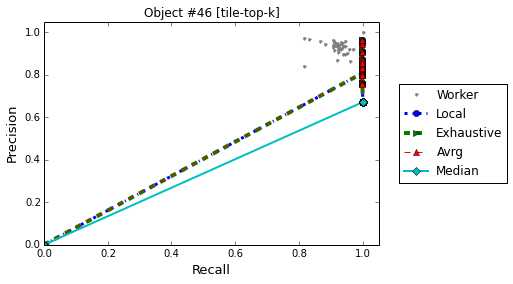

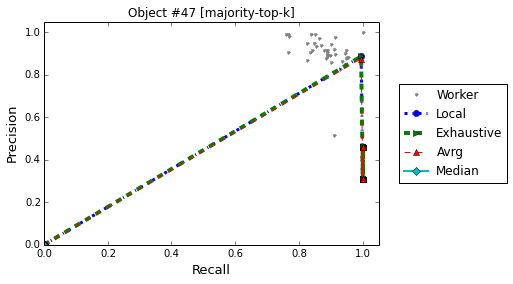

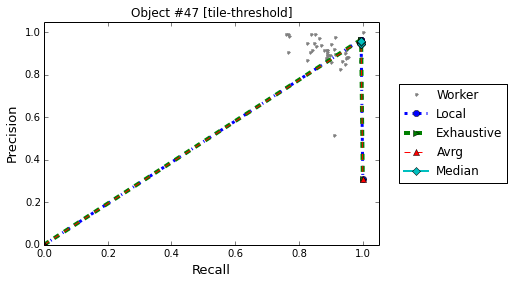

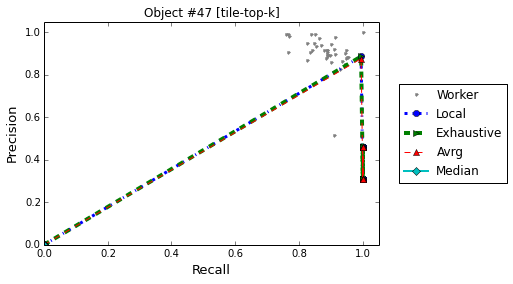

In [65]:
for objid in tqdm(object_lst):
    plot_all_T_search_PR_curves(objid,'majority-top-k')
    plot_all_T_search_PR_curves(objid,'tile-threshold')
    plot_all_T_search_PR_curves(objid,'tile-top-k')

In [7]:
# plot_joined_PR_curves()
## Individual PR Curves
# for objid in tqdm(object_lst):
#     plot_all_PR_curves(objid)